# Min-max scaling

## 1. 載入相關套件

In [77]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

## 簡單測試

In [78]:
# 測試資料
data = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])
data

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

## 驗證

In [64]:
# 計算最大值、最小值
max1 = np.max(data, axis=0)
min1 = np.min(data, axis=0)
max1, min1

(array([ 1., 18.]), array([-1.,  2.]))

In [65]:
# Min-max scaling 計算
(data - min1) / (max1 - min1)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

## 載入資料集

In [66]:
# X, y = datasets.load_iris(return_X_y=True)
X, y = datasets.load_breast_cancer(return_X_y=True)

## 3. 不須進行特徵工程

## 4. 資料分割

In [67]:
# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## 特徵縮放

In [68]:
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [69]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [70]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型計分

In [71]:
y_pred = clf.predict(X_test_std)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [72]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

98.25%


In [73]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[40  2]
 [ 0 72]]


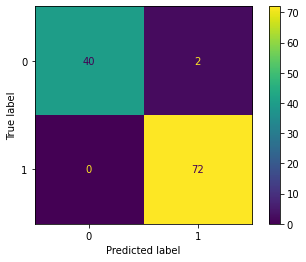

In [74]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

## 不進行特徵縮放

In [75]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%')

96.49%


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
